# Forecasting

### Loading and visualizing the time series dataset

In [201]:
import warnings
warnings.filterwarnings('ignore')

In [202]:
import pandas as pd
import numpy as np

In [203]:
ads_df = pd.read_csv('ads.csv', index_col=['Time'], parse_dates=['Time'])

ads_df.head(10)

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630
2017-09-13 05:00:00,116475
2017-09-13 06:00:00,106495
2017-09-13 07:00:00,102795
2017-09-13 08:00:00,108055


Visualizing *Sale Quantity* over *Month*.

In [204]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

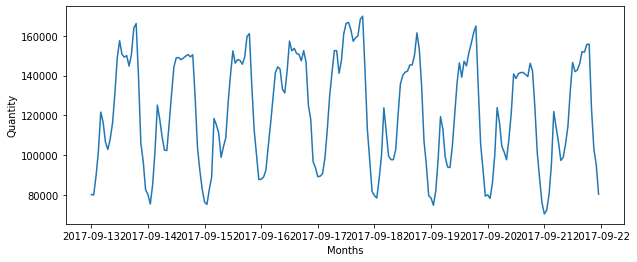

In [205]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( ads_df['Ads'] );

In [206]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2017-09-13 00:00:00 to 2017-09-21 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ads     216 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


## Forecasting using Moving Average

In [207]:
ads_df['mavg_3'] = ads_df['Ads'].rolling( window = 3 ).mean().shift(1)
ads_df['mavg_6'] = ads_df['Ads'].rolling( window = 6 ).mean().shift(1)

In [208]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
ads_df[['Ads', 'mavg_3', 'mavg_6']][0:10]

,Ads,mavg_3,mavg_6
Time,,,
2017-09-13 00:00:00,80115,nan,nan
2017-09-13 01:00:00,79885,nan,nan
2017-09-13 02:00:00,89325,nan,nan
2017-09-13 03:00:00,101930,83108.33,nan
2017-09-13 04:00:00,121630,90380.00,nan
2017-09-13 05:00:00,116475,104295.00,nan
2017-09-13 06:00:00,106495,113345.00,98226.67
2017-09-13 07:00:00,102795,114866.67,102623.33
2017-09-13 08:00:00,108055,108588.33,106441.67


Plotting actual versus the predicted values from moving averaging forecasting.

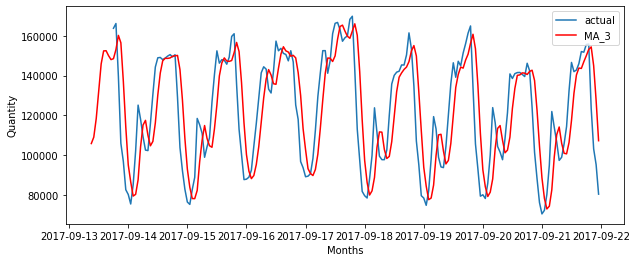

In [242]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( ads_df['Ads'][12:], label = 'actual' );
plt.plot( ads_df['mavg_3'][3:], color = 'red', label = 'MA_3');
plt.legend();

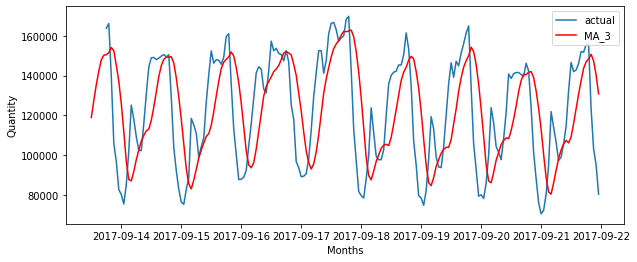

In [243]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( ads_df['Ads'][12:], label = 'actual' );
plt.plot( ads_df['mavg_6'][6:], color = 'red', label = 'MA_3');
plt.legend();

## Calculating forecast accuracy

### Mean absolute percentage error

Mean absolute percentage error (MAPE) is the average of absolute percentage error. Assume that the validation data has *n* observations and the forecasting is carried out on these *n* observations. The mean absolute percentage error is given by

$MAPE = \frac{1}{n}\sum_{t=1}^{n}\frac{\left\lvert Y_{t} - F_{t}\right\rvert}{Y_{t}} * 100 $

MAPE is one of the popular forecasting accuracy measures used by practitioners since it expresses the average error in percentage terms and is easy to interpret. Since MAPE is dimensionless it can be used for comparing different models with varying scales.


In [244]:
import numpy as np

def get_mape(actual, predicted): 
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )

In [245]:
get_mape( ads_df['Ads'][3:].values, 
          ads_df['mavg_3'][3:].values)

13.72

## Forecasting with Exponential Moving Average

One of the drawbacks of simple moving average technique is that it gives equal weight to all the previous observations used in forecasting the future value. Exponential smoothing (SES) technique (also known as simple exponential smoothing) assigns differential weights to past observations.

$F_{t+1} = \alpha Y_{t}+ (1-\alpha)F_{t}$

$\alpha$ is called the smoothing constant and its value lies between 0 and 1.

*ewm()* in pandas provide the features of computing exponential moving averate and take the *alpha* as parameter.

In [246]:
ads_df['ewm'] = ads_df['Ads'].ewm( alpha = 0.9 ).mean().shift(1)

In [247]:
pd.options.display.float_format = '{:.2f}'.format

In [248]:
ads_df[:10]

,Ads,lag_1,lag_2,lag_3,mavg_3,mavg_6,ewm
Time,,,,,,,
2017-09-13 06:00:00,106495,116475.00,121630.00,101930.00,113345.00,98226.67,nan
2017-09-13 07:00:00,102795,106495.00,116475.00,121630.00,114866.67,102623.33,106495.00
2017-09-13 08:00:00,108055,102795.00,106495.00,116475.00,108588.33,106441.67,103131.36
2017-09-13 09:00:00,116125,108055.00,102795.00,106495.00,105781.67,109563.33,107567.07
2017-09-13 10:00:00,131030,116125.00,108055.00,102795.00,108991.67,111929.17,115269.98
2017-09-13 11:00:00,149020,131030.00,116125.00,108055.00,118403.33,113495.83,129454.14
2017-09-13 12:00:00,157590,149020.00,131030.00,116125.00,132058.33,118920.00,147063.43
2017-09-13 13:00:00,150715,157590.00,149020.00,131030.00,145880.00,127435.83,156537.34
2017-09-13 14:00:00,149295,150715.00,157590.00,149020.00,152441.67,135422.50,151297.23


In [249]:
get_mape( ads_df['Ads'][1:].values, 
          ads_df['ewm'][1:].values)

8.39

So, forecasting using exponential moving average has about 10% error (MAPE) from the actual values.

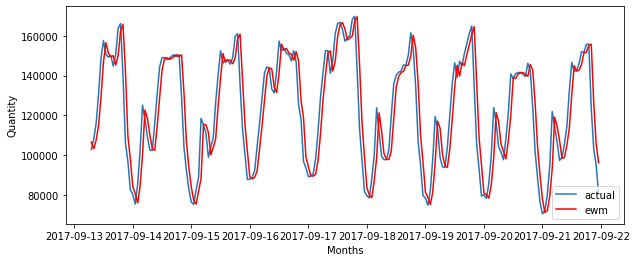

In [250]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( ads_df['Ads'][1:], label = 'actual' );
plt.plot( ads_df['ewm'][1:], color = 'red', label = 'ewm' );
plt.legend();

## Forecasting using Linear Model

In [251]:
ads_df = pd.read_csv('ads.csv', index_col=['Time'], parse_dates=['Time'])

ads_df.head(10)

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630
2017-09-13 05:00:00,116475
2017-09-13 06:00:00,106495
2017-09-13 07:00:00,102795
2017-09-13 08:00:00,108055


In [252]:
ads_df['lag_1'] = ads_df['Ads'].shift(1)
ads_df['lag_2'] = ads_df['Ads'].shift(2)
ads_df['lag_3'] = ads_df['Ads'].shift(3)

In [253]:
ads_df

,Ads,lag_1,lag_2,lag_3
Time,,,,
2017-09-13 00:00:00,80115,nan,nan,nan
2017-09-13 01:00:00,79885,80115.00,nan,nan
2017-09-13 02:00:00,89325,79885.00,80115.00,nan
2017-09-13 03:00:00,101930,89325.00,79885.00,80115.00
2017-09-13 04:00:00,121630,101930.00,89325.00,79885.00
...,...,...,...,...
2017-09-21 19:00:00,155890,155665.00,151790.00,152120.00
2017-09-21 20:00:00,123395,155890.00,155665.00,151790.00
2017-09-21 21:00:00,103080,123395.00,155890.00,155665.00


In [254]:
ads_df['mavg_3'] = ads_df['Ads'].rolling( window = 3 ).mean().shift(1)
ads_df['mavg_6'] = ads_df['Ads'].rolling( window = 6 ).mean().shift(1)

In [255]:
ads_df[0:20]

,Ads,lag_1,lag_2,lag_3,mavg_3,mavg_6
Time,,,,,,
2017-09-13 00:00:00,80115,nan,nan,nan,nan,nan
2017-09-13 01:00:00,79885,80115.00,nan,nan,nan,nan
2017-09-13 02:00:00,89325,79885.00,80115.00,nan,nan,nan
2017-09-13 03:00:00,101930,89325.00,79885.00,80115.00,83108.33,nan
2017-09-13 04:00:00,121630,101930.00,89325.00,79885.00,90380.00,nan
2017-09-13 05:00:00,116475,121630.00,101930.00,89325.00,104295.00,nan
2017-09-13 06:00:00,106495,116475.00,121630.00,101930.00,113345.00,98226.67
2017-09-13 07:00:00,102795,106495.00,116475.00,121630.00,114866.67,102623.33
2017-09-13 08:00:00,108055,102795.00,106495.00,116475.00,108588.33,106441.67


In [256]:
ads_df = ads_df.dropna()

In [257]:
ads_df.shape

(210, 6)

In [258]:
train_set = ads_df[0:180]
test_set = ads_df[180:]

In [259]:
train_set.columns

Index(['Ads', 'lag_1', 'lag_2', 'lag_3', 'mavg_3', 'mavg_6'], dtype='object')

In [260]:
x_features = ['lag_1', 'lag_2', 'lag_3', 'mavg_3', 'mavg_6']

In [261]:
from sklearn.linear_model import LinearRegression

In [262]:
lreg = LinearRegression()

In [263]:
lreg.fit(train_set[x_features], train_set['Ads'])

LinearRegression()

In [264]:
lreg.intercept_

19561.055555555562

In [265]:
lreg.coef_

array([ 2.95079148e+12,  2.95079148e+12,  2.95079148e+12, -8.85237443e+12,
       -1.07983584e-02])

In [266]:
y_pred = lreg.predict(test_set[x_features])

In [267]:
get_mape( test_set['Ads'], y_pred)

6.45

In [268]:
test_set['y_pred'] = y_pred

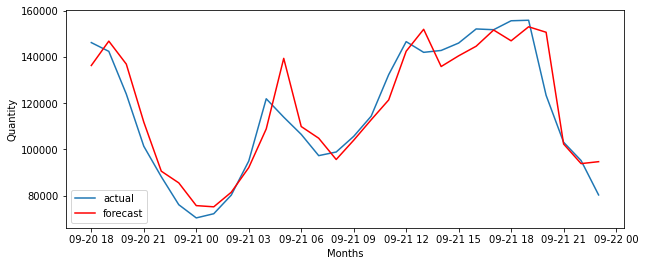

In [269]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( test_set['Ads'], label = 'actual' );
plt.plot( test_set['y_pred'], color = 'red', label = 'forecast' );
plt.legend();

In [270]:
from sklearn.model_selection import TimeSeriesSplit

In [271]:
tscv = TimeSeriesSplit(n_splits=10, max_train_size=24, test_size=12)

In [272]:
scores = []

for train_index, test_index in tscv.split(ads_df):
    lreg.fit(ads_df.iloc[train_index][x_features],ads_df.iloc[train_index]['Ads']) 
    y_pred = lreg.predict(ads_df.iloc[test_index][x_features])
    scores.append(get_mape( ads_df.iloc[test_index]['Ads'], y_pred))
    
scores

[4.62, 5.43, 7.75, 5.92, 6.36, 6.96, 6.92, 5.54, 6.36, 7.31]

In [273]:
np.mean(scores)

6.317

In [274]:
np.std(scores)

0.9081965646268433